In [38]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
from scipy import stats

In [40]:
# import seaborn
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(15,9)})

# Use dark background for figures
#import matplotlib.pyplot as plt
#plt.style.use("dark_background")

In [41]:
def plot_histogram(data, xlabel='', 
                   linewith=1, alpha=0.5, bins=100, kde=False, norm_hist=True, 
                   color='skyblue'
                  ):
    ax = sns.distplot(data,
                      norm_hist=norm_hist,
                      bins=bins,
                      kde=kde,
                      color=color,
                      hist_kws={"linewidth": linewith,'alpha':alpha})
    ax.set(xlabel=xlabel, ylabel='Frequency')
    
    

In [4]:
# 2 cases: fraud and non fraud
# Generate one for classified positives and one for classified negatives.
# For each of those, randomly assign a % of them as class 1, with the right skewed one with a greater probability.
import uuid
import random

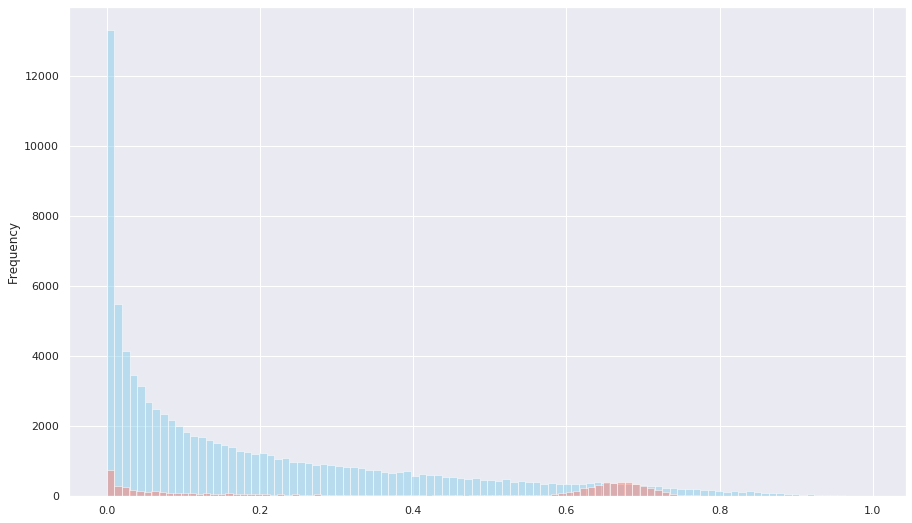

In [5]:
n = 100e3
n = int(n)
lSkew = 0.95

lSkewLabel = 0.05
rSkewLabel = 0.80

lSkewDist = lambda n : stats.beta.rvs(0.5, 2, size=n)
rSkewDist = lambda n : stats.beta.rvs(100, 50, size=n)

df = pd.DataFrame([], columns=['uuid', 'skew', 'score', 'label'])

df['uuid'] = [str(uuid.uuid4()) for _ in range(n)]

df['skew'] = ['l' if random.uniform(0,1) < lSkew else 'r' for _ in range(n)]

df.loc[df['skew'] == 'l', 'label'] = [1 if random.uniform(0,1) < lSkewLabel else 0 for _ in range(len(df[df['skew'] == 'l']))]
df.loc[df['skew'] == 'r', 'label'] = [1 if random.uniform(0,1) < rSkewLabel else 0 for _ in range(len(df[df['skew'] == 'r']))]

df.loc[df['skew'] == 'l', 'score'] = lSkewDist(len(df[df['skew'] == 'l']))
df.loc[df['skew'] == 'r', 'score'] = rSkewDist(len(df[df['skew'] == 'r']))

plot_histogram(df[df['label'] == 0]['score'], color='skyblue', norm_hist=False)
plot_histogram(df[df['label'] == 1]['score'], color='salmon' , norm_hist=False)

In [6]:
df['label'].value_counts()

0    91268
1     8732
Name: label, dtype: int64

In [7]:
# Save file
import datetime
file_name = "./data/distibution demo data {}.csv".format(datetime.datetime.now())
df.to_csv(file_name, index=False)

In [8]:
df

,uuid,skew,score,label
0,ce640f9c-2ea1-4a8b-8797-161d0a5880d0,l,0.233052,0
1,a86a6a10-1f25-4266-81c8-5ddd3fb8b1ed,l,0.401194,0
2,498c02be-fd97-43ec-a868-ec75f12f68c6,l,0.0527996,0
3,5793ea7f-2007-45c7-92e6-4069916db60c,l,0.000664122,0
4,6b217179-0e94-43a2-8201-58c94d6ed5b7,l,0.0210856,0
5,ec05e9ea-2f5e-4fd2-9565-ff22117c16cd,l,0.469698,0
6,faaa2628-3547-4d2e-8c88-af133ed0e203,l,0.298468,0
7,d86bed61-905b-4159-97a5-13c8327aaaa5,l,0.581585,0
8,131f1b05-8120-493e-a678-50b8c77955ed,l,0.0028051,0
9,090a8280-9e25-48ae-819e-af728e6a0734,l,0.00046179,0


In [9]:
def gen_subgroup(group, n = 1000, conf={}):
    n = int(n)
    
    lSkew = 0.95 if 'lSkew' not in conf.keys() else conf['lSkew']
    lSkewLabel = 0.05 if 'lSkewLabel' not in conf.keys() else conf['lSkewLabel']
    rSkewLabel = 0.80 if 'rSkewLabel' not in conf.keys() else conf['rSkewLabel']
    lSkewDist = lambda n : stats.beta.rvs(0.5,  2, size=n) if 'lSkewDist' not in conf.keys() else conf['lSkewDist']
    rSkewDist = lambda n : stats.beta.rvs(100, 50, size=n) if 'rSkewDist' not in conf.keys() else conf['rSkewDist']

    df = pd.DataFrame([], columns=['uuid', 'group', 'skew', 'score', 'label'])
    
    df['uuid'] = [str(uuid.uuid4()) for _ in range(n)]

    df['group'] = group
    
    df['skew'] = ['l' if random.uniform(0,1) < lSkew else 'r' for _ in range(n)]

    df.loc[df['skew'] == 'l', 'label'] = [1 if random.uniform(0,1) < lSkewLabel else 0 for _ in range(len(df[df['skew'] == 'l']))]
    df.loc[df['skew'] == 'r', 'label'] = [1 if random.uniform(0,1) < rSkewLabel else 0 for _ in range(len(df[df['skew'] == 'r']))]

    df.loc[df['skew'] == 'l', 'score'] = lSkewDist(len(df[df['skew'] == 'l']))
    df.loc[df['skew'] == 'r', 'score'] = rSkewDist(len(df[df['skew'] == 'r']))
    
    return df

    

In [10]:
df = gen_subgroup("Group 1", n=5000)
df = df.append(gen_subgroup("Group 2", n=1000))
df = df.append(gen_subgroup("Group 3", n= 500))
df = df.append(gen_subgroup("Group 4", n=3000))
df["score"] = df["score"].apply(lambda x: "{:.2f}".format(x))

In [11]:
len(df[df["label"] == 1])

835

In [12]:
len(df[df["label"] == 1].index)

835

In [13]:
df[df["label"] == 1].shape[0]

835

In [15]:
df_score_bins = df.drop(columns=['skew']).groupby(["group", "score", "label"]).count().reset_index()
df_score_bins['score'] = df_score_bins['score'].apply(lambda x: float(x))

In [16]:
def get_stats(df, threshold):
    stats = {}
    
    stats["threshold"] = threshold
    
    stats['n'] = df['uuid'].sum()
    stats['positives'] = df[(df["label"] == 1)]['uuid'].sum()
    stats['negatives'] = df[(df["label"] == 0)]['uuid'].sum()
    
    stats['tp'] = df[(df["score"] >= threshold) & (df["label"] == 1)]['uuid'].sum()
    stats['tn'] = df[(df["score"]  < threshold) & (df["label"] == 0)]['uuid'].sum()
    stats['fp'] = df[(df["score"] >= threshold) & (df["label"] == 0)]['uuid'].sum()
    stats['fn'] = df[(df["score"]  < threshold) & (df["label"] == 1)]['uuid'].sum()
    
    stats["recall"] = stats['tp'] / stats["positives"]
    stats["alerts"] = stats['tp'] + stats['fp']
    
    return stats
    
    

In [17]:
df1 = df_score_bins[df_score_bins["group"] == 'Group 1']

In [18]:
get_stats(df1, 0.2)

{'alerts': 2059,
 'fn': 136,
 'fp': 1747,
 'n': 5000,
 'negatives': 4552,
 'positives': 448,
 'recall': 0.6964285714285714,
 'threshold': 0.2,
 'tn': 2805,
 'tp': 312}

In [19]:
df_recall_per_threshold = pd.DataFrame(columns=["threshold"])
df_recall_per_threshold.threshold = np.linspace(0,1,101)

In [20]:
df_recall_per_threshold["recall"] = df_recall_per_threshold.threshold.apply(lambda x: get_stats(df_score_bins[df_score_bins["group"] == 'Group 1'], x)['recall'])
df_recall_per_threshold["alerts"] = df_recall_per_threshold.threshold.apply(lambda x: get_stats(df_score_bins[df_score_bins["group"] == 'Group 1'], x)['alerts'])

In [21]:
df_recall_per_threshold.head(25)

,threshold,recall,alerts
0,0.00,1.000000,5000
1,0.01,0.944196,4480
2,0.02,0.901786,4111
3,0.03,0.890625,3888
4,0.04,0.861607,3674
5,0.05,0.848214,3496
6,0.06,0.828125,3313
7,0.07,0.812500,3184
8,0.08,0.799107,3060
9,0.09,0.785714,2958


In [27]:
df1

,group,score,label,uuid
0,Group 1,0.00,0,495
1,Group 1,0.00,1,25
2,Group 1,0.01,0,350
3,Group 1,0.01,1,19
4,Group 1,0.02,0,218
5,Group 1,0.02,1,5
6,Group 1,0.03,0,201
7,Group 1,0.03,1,13
8,Group 1,0.04,0,172
9,Group 1,0.04,1,6


In [29]:
pd.plot

AttributeError: module 'pandas' has no attribute 'plot'

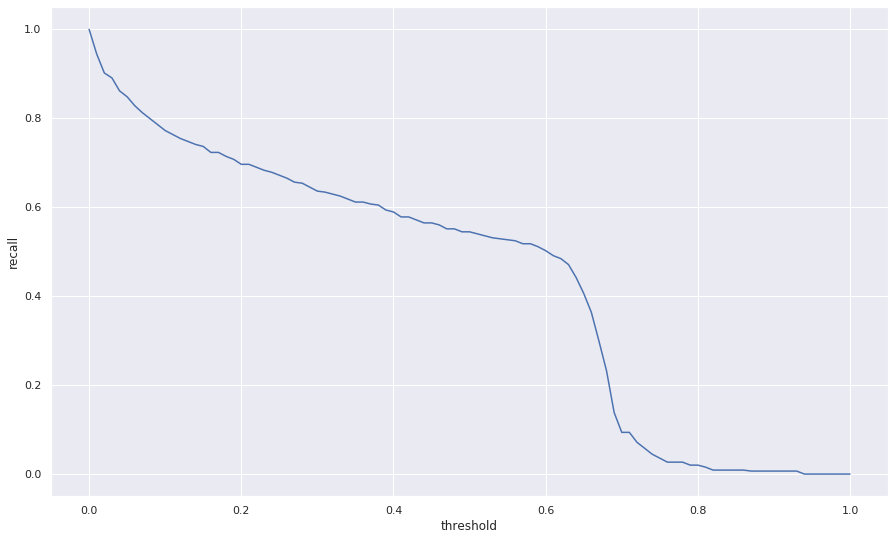

In [33]:
sns.lineplot(df_recall_per_threshold.threshold, df_recall_per_threshold.recall)

In [32]:
df_recall_per_threshold

,threshold,recall,alerts
0,0.00,1.000000,5000
1,0.01,0.944196,4480
2,0.02,0.901786,4111
3,0.03,0.890625,3888
4,0.04,0.861607,3674
5,0.05,0.848214,3496
6,0.06,0.828125,3313
7,0.07,0.812500,3184
8,0.08,0.799107,3060
9,0.09,0.785714,2958


In [34]:
fmri = sns.load_dataset("fmri")


In [35]:
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
5,s9,18,stim,parietal,-0.103513
6,s8,18,stim,parietal,-0.064408
7,s7,18,stim,parietal,-0.060526
8,s6,18,stim,parietal,-0.007029
9,s5,18,stim,parietal,-0.040557


In [56]:
def get_df_stats(df_score_bins):
    df = pd.DataFrame(columns=["threshold"])
    df.threshold = np.linspace(0,1,101)
    df["recall"] = df.threshold.apply(lambda x: get_stats(df_score_bins, x)['recall'])
    df["alerts"] = df.threshold.apply(lambda x: get_stats(df_score_bins, x)['alerts'])
    return df



def get_stats_all_groups(df_score_bins):
    groups = df_score_bins['group'].drop_duplicates()
    df_all = []
    for group in groups:
        df_group = get_df_stats(df_score_bins[df_score_bins["group"] == group])
        df_group['group'] = group
        df_all.append(df_group)
    df = pd.concat(df_all)
    return df
    


In [59]:
df_score_bins_groups = get_stats_all_groups(df_score_bins)
df_score_bins_groups.head(25)

,threshold,recall,alerts,group
0,0.00,1.000000,5000,Group 1
1,0.01,0.944196,4480,Group 1
2,0.02,0.901786,4111,Group 1
3,0.03,0.890625,3888,Group 1
4,0.04,0.861607,3674,Group 1
5,0.05,0.848214,3496,Group 1
6,0.06,0.828125,3313,Group 1
7,0.07,0.812500,3184,Group 1
8,0.08,0.799107,3060,Group 1
9,0.09,0.785714,2958,Group 1


In [ ]:
sns.lineplot(df_recall_per_threshold.threshold, df_recall_per_threshold.recall)

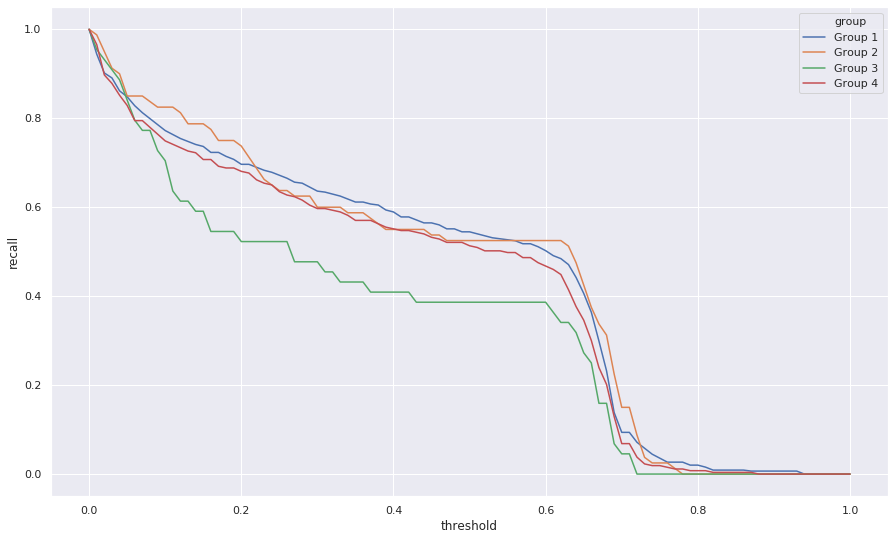

In [61]:
sns.lineplot(x='threshold', y='recall', hue='group' ,data=df_score_bins_groups)

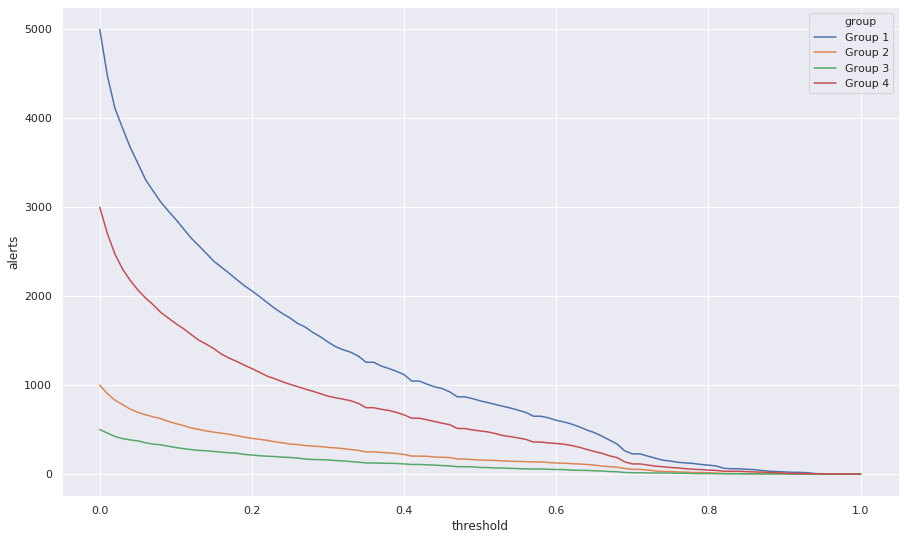

In [62]:
sns.lineplot(x='threshold', y='alerts', hue='group' ,data=df_score_bins_groups)

In [63]:
df_score_bins_groups

,threshold,recall,alerts,group
0,0.00,1.000000,5000,Group 1
1,0.01,0.944196,4480,Group 1
2,0.02,0.901786,4111,Group 1
3,0.03,0.890625,3888,Group 1
4,0.04,0.861607,3674,Group 1
5,0.05,0.848214,3496,Group 1
6,0.06,0.828125,3313,Group 1
7,0.07,0.812500,3184,Group 1
8,0.08,0.799107,3060,Group 1
9,0.09,0.785714,2958,Group 1


In [65]:
get_stats(df_score_bins, 0.1)

{'alerts': 5418,
 'fn': 195,
 'fp': 4778,
 'n': 9500,
 'negatives': 8665,
 'positives': 835,
 'recall': 0.7664670658682635,
 'threshold': 0.1,
 'tn': 3887,
 'tp': 640}

In [72]:
groups = df_score_bins['group'].drop_duplicates().tolist()
groups = ['Threshold ' + x for x in groups]

In [75]:
groups

['Threshold Group 1',
 'Threshold Group 2',
 'Threshold Group 3',
 'Threshold Group 4']

In [79]:
list(zip([[x]*4 for x in groups]))

[(['Threshold Group 1',
   'Threshold Group 1',
   'Threshold Group 1',
   'Threshold Group 1'],),
 (['Threshold Group 2',
   'Threshold Group 2',
   'Threshold Group 2',
   'Threshold Group 2'],),
 (['Threshold Group 3',
   'Threshold Group 3',
   'Threshold Group 3',
   'Threshold Group 3'],),
 (['Threshold Group 4',
   'Threshold Group 4',
   'Threshold Group 4',
   'Threshold Group 4'],)]

In [84]:
from itertools import combinations
comb = combinations([2, 1, 3], [2,4])
for i in list(comb): 
    print(i)

TypeError: 'list' object cannot be interpreted as an integer